In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("13-car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
#Sütun isimleri yanlış verildiği için doğrularıyla değiştiriyoruz
col_names = ["buying","maintenance_cost","doors","persons","lug_boot","safety","decision_class"]

In [6]:
df.columns = col_names

In [7]:
df.head()

,buying,maintenance_cost,doors,persons,lug_boot,safety,decision_class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info() #hepsi object olarak tanımlanmış

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying            1727 non-null   object
 1   maintenance_cost  1727 non-null   object
 2   doors             1727 non-null   object
 3   persons           1727 non-null   object
 4   lug_boot          1727 non-null   object
 5   safety            1727 non-null   object
 6   decision_class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
#sınıflandırmayı neye göre yapacağız daha iyi anlayalım
for col in df.columns:
    print(df[col].value_counts()) #her kolunun value_counts'ını yazdıralım
    

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance_cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
decision_class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
# decision_class ->> target variable, dependent
# doors, persons ->> numeric olarak alacağız
# geriye kalanlar da kategorik

In [11]:
df.isnull().sum()

buying              0
maintenance_cost    0
doors               0
persons             0
lug_boot            0
safety              0
decision_class      0
dtype: int64

### Feature Engineering

In [12]:
#İlk olarak numeric olması gerekenleri çevirelim
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [13]:
df["doors"] = df["doors"].replace('5more','5') #5more gördüğü her yere 5 yazsın

In [14]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [15]:
df["doors"] = df["doors"].astype(int)

In [16]:
#persons için yapalım
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [17]:
df["persons"] = df["persons"].replace('more','5')

In [18]:
df["persons"].unique()

array(['2', '4', '5'], dtype=object)

In [19]:
df["persons"] = df["persons"].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying            1727 non-null   object
 1   maintenance_cost  1727 non-null   object
 2   doors             1727 non-null   int64 
 3   persons           1727 non-null   int64 
 4   lug_boot          1727 non-null   object
 5   safety            1727 non-null   object
 6   decision_class    1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


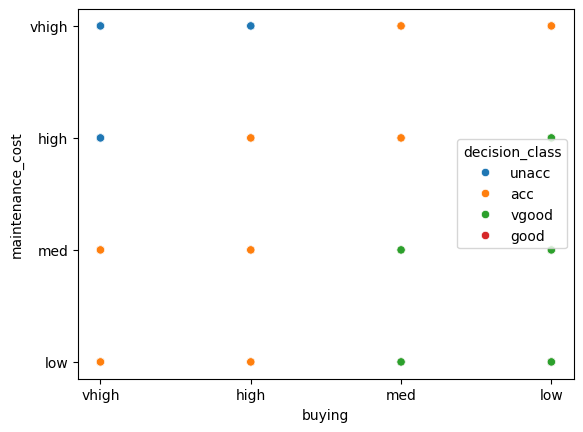

In [21]:
sns.scatterplot(x= df["buying"], y = df["maintenance_cost"], hue=df["decision_class"])
plt.show()

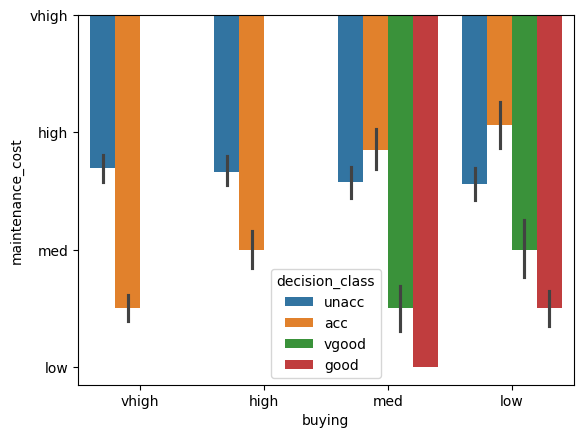

In [22]:
sns.barplot(x= df["buying"], y = df["maintenance_cost"], hue=df["decision_class"])
plt.show()

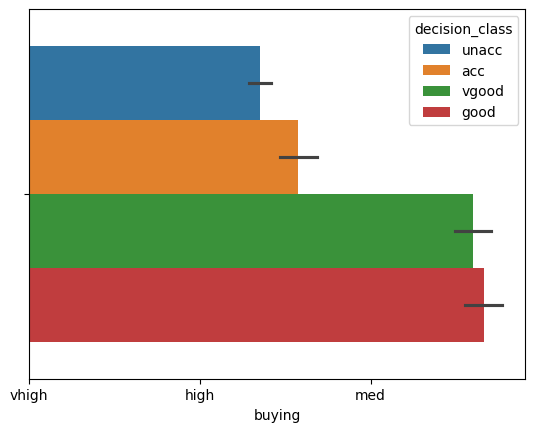

In [23]:
sns.barplot(x= df["buying"], hue=df["decision_class"])
plt.show()

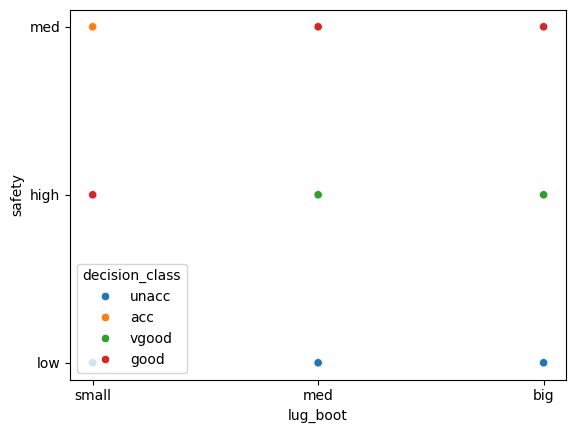

In [24]:
sns.scatterplot(x= df["lug_boot"], y = df["safety"], hue=df["decision_class"])
plt.show()

In [25]:
#Encoding yapmadan önce bunu yapmalıyız
X = df.drop("decision_class", axis=1)
y = df["decision_class"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [28]:
X_train.shape

(1208, 6)

### Ordinal Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
categorical_cols = ["buying","maintenance_cost","lug_boot","safety"]
numerical_cols = ["doors","persons"]

#kategorik olanlara ordinal encoding yapacağız
ordinal_encoder = OrdinalEncoder(categories = [
    ["low", "med", "high", "vhigh"], #buying için
    ["low", "med", "high", "vhigh"], #maintenance_cost
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety 
])


#Ordinal Encoder'ı kullanmak için:
#Kolonları transform etmeye yarar.
preprocessor = ColumnTransformer(
    transformers=[
        #buraya istediğimiz kadar transformer koyabiliriz
        ('transformation_name_doesnt_matter', ordinal_encoder, categorical_cols) #tuple olacak şekilde
        #('isim_farketmiyor', one_hot_encoder, one_hot_cols),
        #('label_icin', label_encoder, label_cols),
        
    ],
    remainder="passthrough" 
)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [31]:
pd.DataFrame(X_train_transformed) #dataframe'e çevirdik. 

,0,1,2,3,4,5
0,0.0,3.0,1.0,1.0,3.0,2.0
1,0.0,2.0,1.0,1.0,5.0,4.0
2,0.0,2.0,0.0,1.0,3.0,4.0
3,0.0,3.0,2.0,2.0,2.0,5.0
4,1.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...
1203,2.0,1.0,0.0,2.0,2.0,5.0
1204,3.0,2.0,1.0,1.0,3.0,5.0
1205,3.0,0.0,2.0,1.0,4.0,2.0
1206,2.0,2.0,2.0,1.0,5.0,5.0


In [32]:
pd.DataFrame(X_train_transformed)[4].unique() #door

array([3., 5., 2., 4.])

In [33]:
pd.DataFrame(X_train_transformed)[1].unique()

array([3., 2., 0., 1.])

In [34]:
pd.DataFrame(X_train_transformed)[2].unique() 

array([1., 0., 2.])

In [35]:
pd.DataFrame(X_train_transformed)[3].unique()

array([1., 2., 0.])

In [36]:
pd.DataFrame(X_train_transformed)[5].unique() #persons

array([2., 4., 5.])

In [37]:
#Training

from sklearn.tree import DecisionTreeClassifier

In [39]:
tree_model = DecisionTreeClassifier(criterion= "gini", max_depth=3, random_state=0)

tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
y_pred = tree_model.predict(X_test_transformed)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))

Accuracy Score: 0.7861271676300579
Confusion Matrix: 
 [[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
Classification Report 
               precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


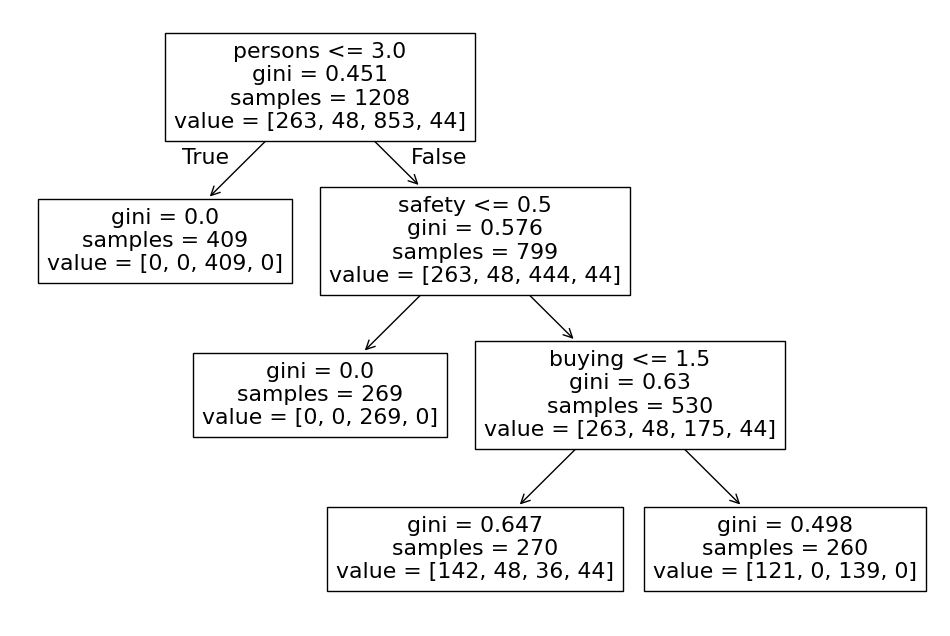

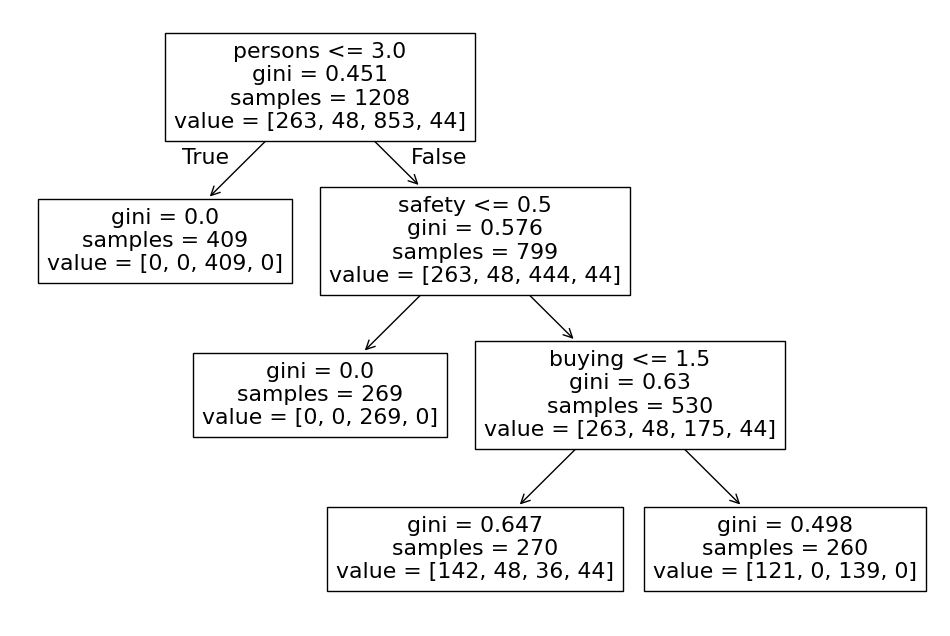

In [44]:
plt.figure(figsize=(12,8))

from sklearn import tree
# categorical_cols = ["buying","maintenance_cost","lug_boot","safety"]
# numerical_cols = ["doors","persons"]
column_names = categorical_cols + numerical_cols

tree.plot_tree(tree_model.fit(X_train_transformed,y_train), feature_names =column_names ) #ağacı çizer
plt.show()

### Hyperparameter Tuning

In [45]:
param = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "max_depth": [1,2,3,4,5,15,None],
    "max_features" : ["sqrt","log2",None]
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param, cv=5, scoring="accuracy")

In [48]:
import warnings
warnings.filterwarnings("ignore") #uyarıları ignore eder
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [49]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [50]:
y_pred2 = grid.predict(X_test_transformed)

In [52]:
print("Accuracy Score:", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("Classification Report \n", classification_report(y_test,y_pred2))

Accuracy Score: 0.9730250481695568
Confusion Matrix: 
 [[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
Classification Report 
               precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



In [57]:
tree_model_new = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_features=None, splitter="best")

In [58]:
tree_model_new.fit(X_train_transformed,y_train)
y_pred3 = tree_model_new.predict(X_test_transformed)
print("Accuracy Score:", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("Classification Report \n", classification_report(y_test,y_pred2))

Accuracy Score: 0.9730250481695568
Confusion Matrix: 
 [[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
Classification Report 
               precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



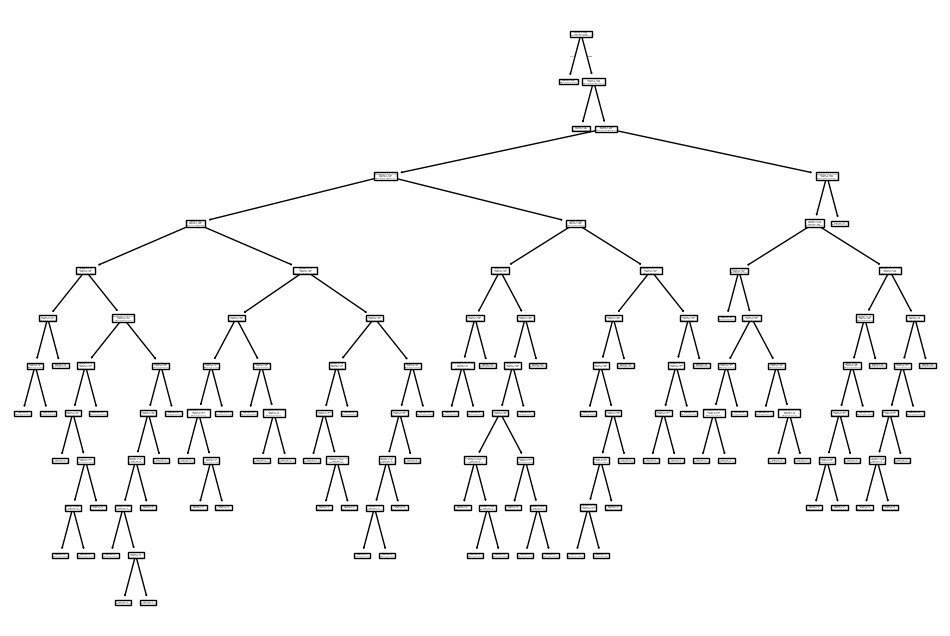

In [63]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model_new.fit(X_train_transformed,y_train), feature_names =column_names ) #ağacı çizer
plt.show()

### Pruning - Budama

In [64]:
#Iris datasetini kullanarak yapacağız
df_new = pd.read_csv("11-iris.csv")

In [65]:
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
X = df_new.drop(["Id","Species"], axis = 1) #Id'ye ihtiyacımız yok
y = df_new["Species"]

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [69]:
tree_model2 = DecisionTreeClassifier()

In [70]:
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier()

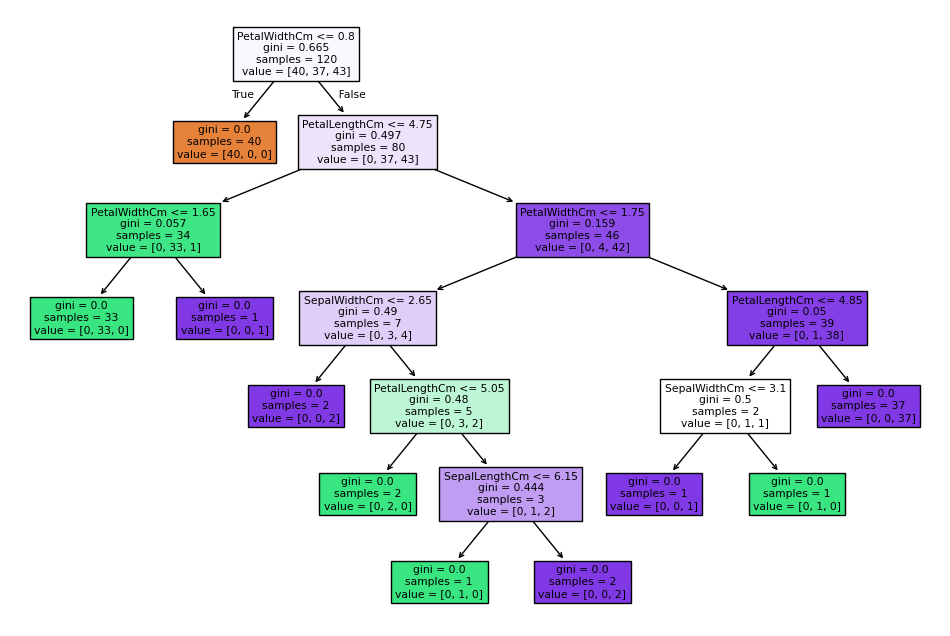

In [73]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model2.fit(X_train,y_train), feature_names =X_train.columns, filled = True ) #ağacı çizer
plt.show()
#filled=true renklendiriyor

In [74]:
y_pred4 = tree_model2.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred4))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred4))
print("Classification Report \n", classification_report(y_test,y_pred4))

Accuracy Score: 0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [75]:
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(X_train,y_train)
y_pred4 = tree_model2.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred4))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred4))
print("Classification Report \n", classification_report(y_test,y_pred4))

Accuracy Score: 0.9333333333333333
Confusion Matrix: 
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



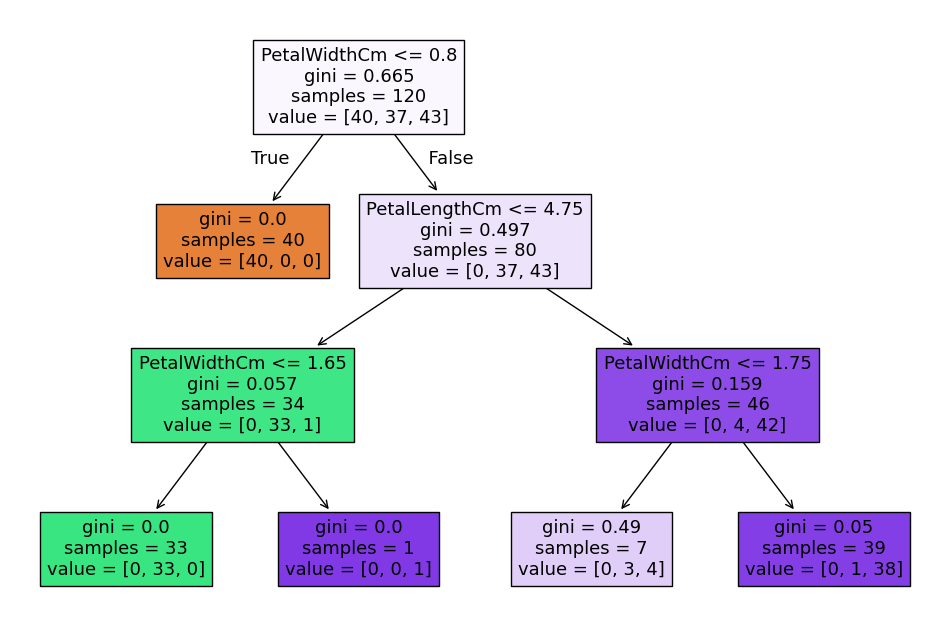

In [76]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model2.fit(X_train,y_train), feature_names =X_train.columns, filled = True ) #ağacı çizer
plt.show()